In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline ,make_pipeline
from sklearn import tree

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\Breast Cancer Wisconsin (Diagnostic) Data Set  - Breast Cancer Wisconsin (Diagnostic) Data Set .csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df['diagnosis'].unique()             #M khabees

array(['M', 'B'], dtype=object)

malignant---> khabis 
begnin----> 7ameed

In [5]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
m_df=df[df['diagnosis']=='M']
m_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

stratify used to make sure that a fair split is done from each class / each class is split with the same precentage

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=52,stratify=y)

In [11]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((455, 30), (114, 30), (455,), (114,))

# logistic regression

In [12]:
model=LogisticRegression(random_state=3,max_iter=200,penalty='l1',solver='liblinear')

# scaling

In [13]:
scaler=MinMaxScaler()
scaler.fit(xtrain)
xtrain_scaled=scaler.transform(xtrain)
xtest_scaled=scaler.transform(xtest)

In [49]:
model.fit(xtrain_scaled,ytrain)

LogisticRegression(max_iter=200, penalty='l1', random_state=3,
                   solver='liblinear')

In [50]:
y_predict=model.predict(xtest_scaled)

In [51]:
y_predict

array(['B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M'], dtype=object)

In [17]:
comparison_df=pd.DataFrame({'y_predict':y_predict,'y_test':ytest})
comparison_df

,y_predict,y_test
470,B,B
98,B,B
284,B,B
311,B,B
3,M,M
...,...,...
32,M,M
140,B,B
443,B,B
521,M,M


In [18]:
accuracy_score(y_predict,ytest)

0.9824561403508771

# KNN

In [19]:
from sklearn.metrics import accuracy_score


In [20]:
model2 = KNeighborsClassifier(n_neighbors=9)


In [21]:
model2.fit(xtrain_scaled, ytrain)


KNeighborsClassifier(n_neighbors=9)

In [22]:
predict = model2.predict(xtest_scaled)


In [23]:
accuracy_score(predict,ytest)
print(accuracy_score)

<function accuracy_score at 0x000001C7EB3AC430>


In [24]:
accuracy=model2.score(xtrain,ytrain)
print(accuracy)

0.37362637362637363


In [25]:
model2.score(xtrain,ytrain)

0.37362637362637363

# SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svc = SVC()
svc.fit(xtrain_scaled, ytrain)

SVC()

In [28]:
y_pred_svc =svc.predict(xtest_scaled)
y_pred_svc.shape

(114,)

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(ytest, y_pred_svc)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[71  1]
 [ 1 41]]


In [31]:
creport = classification_report(ytest, y_pred_svc)
print("Classification report:\n",creport)

Classification report:
               precision    recall  f1-score   support

           B       0.99      0.99      0.99        72
           M       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# cross validation cv

In [32]:
cross_val_score(LogisticRegression(random_state=3),xtrain,ytrain)

array([0.94505495, 0.91208791, 0.94505495, 0.94505495, 0.95604396])

# grid serach

In [52]:
#dictionary
parameters={'logisticregression__penalty':['l1','l2'],
           'logisticregression__solver':['lbfgs','liblinear']
           ,'logisticregression__C':[0.2,0.6,0.9,1,1.2,1.6]}

In [53]:
lr_pipeline=make_pipeline(StandardScaler(),LogisticRegression(random_state=3))

In [54]:
grid=GridSearchCV(estimator=lr_pipeline,param_grid=parameters,cv=5,n_jobs=-1,scoring='f1_macro')

In [55]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=3))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.2, 0.6, 0.9, 1, 1.2, 1.6],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'logisticregression__solver': ['lbfgs', 'liblinear']},
             scoring='f1_macro')

In [56]:
grid.best_params_

{'logisticregression__C': 0.6,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [57]:
grid.best_score_

0.9740400146104348

# decision tree

In [58]:
decision_tree= tree.DecisionTreeClassifier(random_state=3,max_depth=5,criterion='entropy',max_features=13)

In [59]:
decision_tree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=13,
                       random_state=3)

In [60]:
predict_test=decision_tree.predict(xtest)
accuracy_score(predict_test,ytest)

0.9736842105263158

In [61]:
prediction_train=decision_tree.predict(xtrain)
accuracy_score(prediction_train,ytrain)

0.9912087912087912

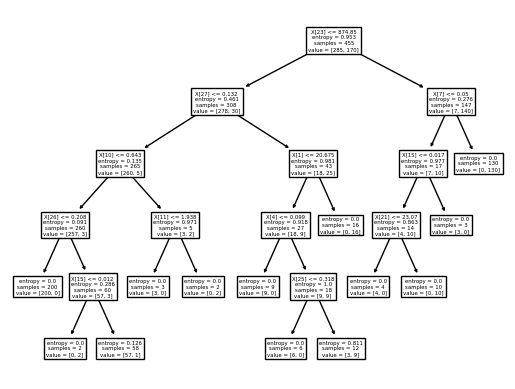

In [62]:
tree.plot_tree(decision_tree)
plt.show()

<AxesSubplot:xlabel='features'>

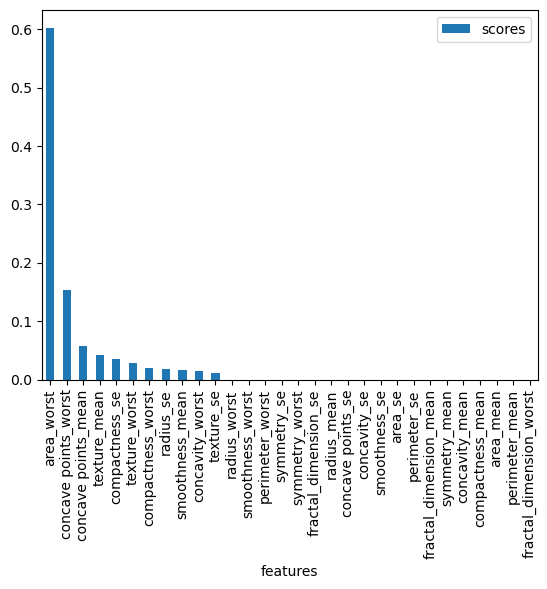

In [63]:
tree_df=pd.DataFrame({'features':decision_tree.feature_names_in_,'scores':decision_tree.feature_importances_})
tree_df.sort_values(by='scores',ascending=False).plot(kind='bar',x='features')

# random forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_model=RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
rf_model.fit(xtrain,ytrain)
predict=rf_model.predict(xtest)

In [47]:
predict_test_rf=rf_model.predict(xtest)
accuracy_score(predict_test_rf,ytest)

0.9824561403508771

In [48]:
prediction_train_rf=rf_model.predict(xtrain)
accuracy_score(prediction_train_rf,ytrain)

0.9648351648351648